<a href="https://colab.research.google.com/github/claarr/MachineLearning/blob/main/MCL_Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama  : Clarita Putri Anggraeni
# Kelas : TI-3G
# NIM   : 2141720213

## Jobsheet 5
## Link github :

## GAMMA CORRECTION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

 Gamma Correction pada citra 
Masukkan nilai Gamma: 6


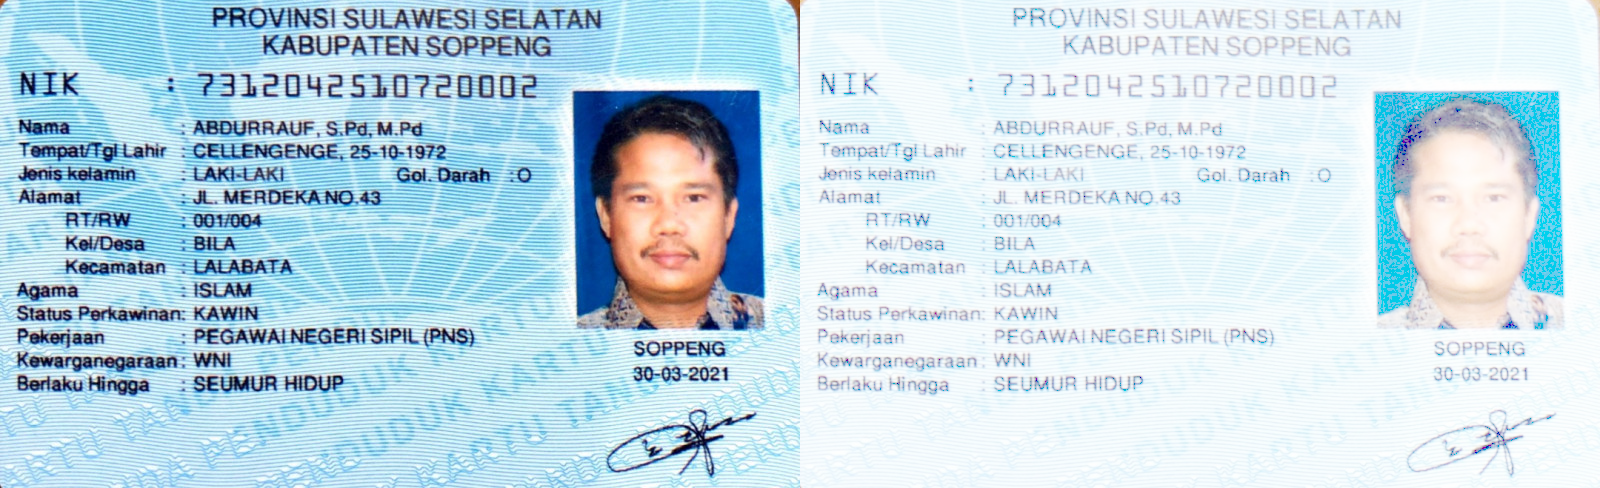

In [ ]:
print(' Gamma Correction pada citra ')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Kuliah/SEMESTER 5/PCVK/Images/KTP.jpeg')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

## BIT DEPTH

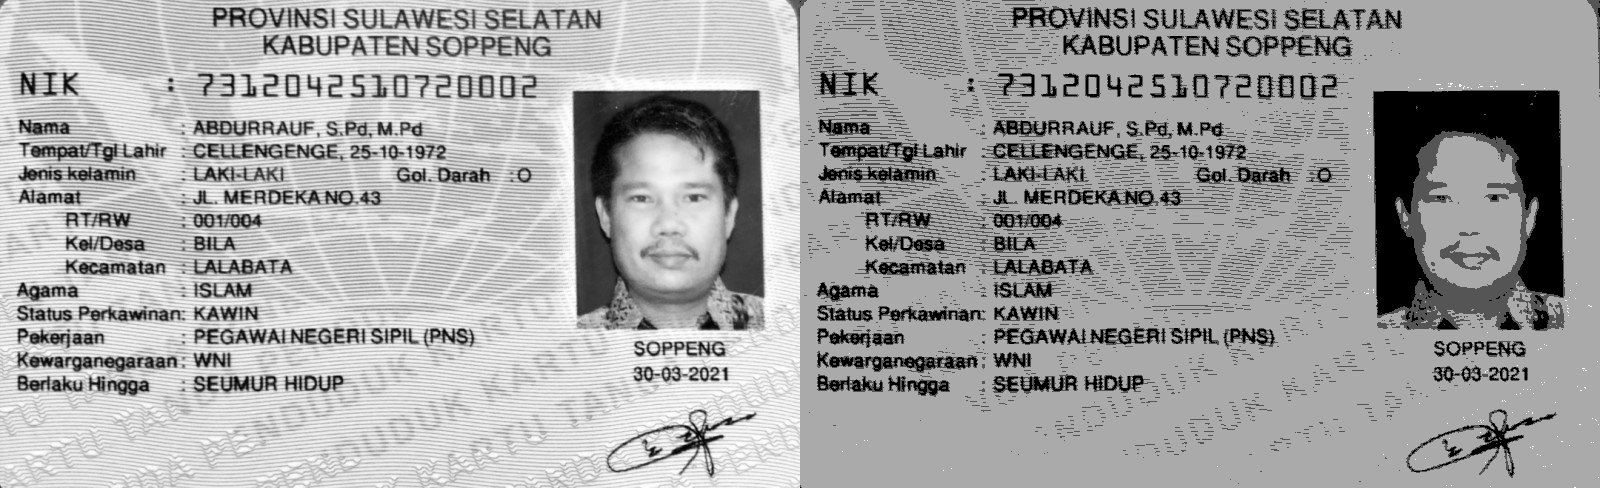

In [ ]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/Kuliah/SEMESTER 5/PCVK/Images/KTP.jpeg', cv.IMREAD_GRAYSCALE)

depth_image = np.zeros(original.shape, original.dtype)
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        depth_image[i, j] = int(original[i, j] / level) * level

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

## AVERAGE DENOISING

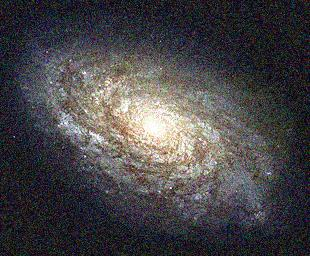

In [ ]:
import glob

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Kuliah/SEMESTER 5/PCVK/Images/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

dst = cv.fastNlMeansDenoisingColoredMulti(cv_img, 99, 1)
cv2_imshow(n)

In [ ]:
import math

def PSNR(img,amount):
  first_image = img[0]
  for x in range(1,amount):
    if(x==0):
      continue
    first_image = first_image - img[x]
    #print(x)
  mse = np.mean((first_image) ** amount)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

print('PSNR')
print('------------------------------')
try:
  averageCitra = int(input('Masukan jumlah citra average: '))
except ValueError:
  print('Error, not a number')
result = PSNR(cv_img,averageCitra)
print('Nilai PSNR: ')
print(result)

PSNR
------------------------------
Masukan jumlah citra average: 5
Nilai PSNR: 
28.347387881857415


## IMAGE MASKING

### Operator OR